#  **Welcome To Colaboratory**

https://colab.research.google.com/?utm_source=scs-index#scrollTo=Nma_JWh-W-IF

# **Pytorch**

Note: We will be using the latest stable version of PyTorch so be sure to run the command above to install the latest version of PyTorch, which as the time of this tutorial was 1.2.0. 

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.8 kB/s 
     |████████████████████████████████| 8.8 MB 60.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.2.0+cu92 which is incompatible.


In [ ]:
# We PyTorch belowing using the `torch` module. 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)

1.2.0+cu92


## Import The Data
The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which is like the Hello World dataset of machine learning. 

Besides importing the data, we will also do a few more things:
- We will tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders or what are referred to as iterators, which makes it easy to efficiently feed data in batches to deep learning models. 
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. I encourage you to experiment with different batches.

In [ ]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

9920512it [00:00, 107192172.57it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 1873843.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 51969384.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 408077.75it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


Done!


## Exploring the Data
As a practioner and researcher, I am always spending a bit of time and effort exploring and understanding the dataset. It's fun and this is a good practise to ensure that everything is in order. 

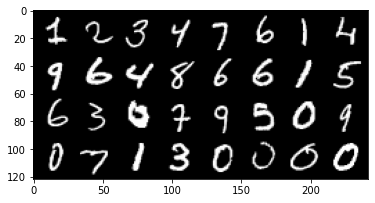

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
print(a, type(a))

tensor([[0.4673, 0.6980, 0.5606],
        [0.6731, 0.6567, 0.5084],
        [0.2413, 0.3498, 0.0472]]) <class 'torch.Tensor'>


In [ ]:
# one of the main advantages of using pytorch tensors is that you can transfer 
# them to GPU device for faster computations involving tensor operations (which 
# you cannot do for a regular numpy array)

# check the available GPU device
torch.cuda.device_count()

# get a name of GPU
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
# transfer tensor to a GPU device
a = a.cuda()
print(a)
a.is_cuda

tensor([[0.4673, 0.6980, 0.5606],
        [0.6731, 0.6567, 0.5084],
        [0.2413, 0.3498, 0.0472]], device='cuda:0')


True

In [ ]:
a = a.cpu()
print(a)

tensor([[0.4673, 0.6980, 0.5606],
        [0.6731, 0.6567, 0.5084],
        [0.2413, 0.3498, 0.0472]])
